# Modélisation
1-Feature selection
2-Finetuning/Cross Validation

### Chargement des données

In [1]:
import pandas as pd
from src.data_eng.prepare_db import *

full_dataset = load_dataset("bank-additional-full.csv")
print("Le dataset contient", len(full_dataset), "lignes")

Le dataset contient 41188 lignes


### Définition des types de variables
- Features en entrée par type

In [2]:
features = full_dataset.columns[:-1]
continuous_features = [col for col in features if full_dataset[col].dtype != 'object']
print("Variables continues:", continuous_features)
categorical_features = [col for col in features if full_dataset[col].dtype == 'object']
print("Variables categoriques:", categorical_features)
# On vérifie qu'on oublie rien (des dates ou autres)
print("Toutes les variables sont prises en compte:",
      (set(categorical_features).union(continuous_features)).difference(set(features)))

Variables continues: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Variables categoriques: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Toutes les variables sont prises en compte: set()


- Réencodage de la cible

In [3]:
target_column = "y"
full_dataset[target_column] = full_dataset[target_column].map({"yes": 1, "no": 0})


### On encode les variables catégoriques avec du one-hot encoding

In [4]:
full_dataset_encoded = pd.get_dummies(full_dataset, columns=categorical_features, drop_first=True)

### On divise le dataset en train/test

In [5]:
train, test = split_dataset(full_dataset_encoded, 0.6)  # fonction custom mais on peut utiliser sklearn
train_targets = train[target_column]
test_targets = test[target_column]
train = train.drop(columns=["y"])
test = test.drop(columns=["y"])

### Selection de feature.
- Modèle de base pour avoir l'importance des features
- Sélection itérative en retirant les features les moins importantes
- Evaluation sur la base de test

In [6]:

from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from src.modelling.cross_validation import feature_selection

results_selection = feature_selection(XGBClassifier, train, train_targets, test, test_targets,
                                      metric=f1_score)


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=53, Metric: 59.32%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=53, Metric: 59.32%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=53, Metric: 59.32%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.002, n=50, Metric: 59.32%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.004, n=49, Metric: 58.90%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=48, Metric: 58.94%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=47, Metric: 58.35%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=46, Metric: 59.24%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=45, Metric: 58.00%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=44, Metric: 58.57%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=43, Metric: 58.79%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=42, Metric: 59.23%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=41, Metric: 60.14%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=40, Metric: 59.66%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=39, Metric: 57.99%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=38, Metric: 58.03%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=37, Metric: 58.97%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=36, Metric: 59.07%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=35, Metric: 58.70%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=34, Metric: 59.43%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=33, Metric: 59.45%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=32, Metric: 58.44%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=31, Metric: 57.94%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=30, Metric: 58.71%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=29, Metric: 58.60%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=28, Metric: 58.33%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=27, Metric: 58.01%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=26, Metric: 58.48%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=25, Metric: 59.61%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=24, Metric: 58.04%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=23, Metric: 57.72%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=22, Metric: 58.59%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=21, Metric: 58.56%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=20, Metric: 59.63%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=19, Metric: 59.34%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=18, Metric: 59.12%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=17, Metric: 58.31%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=16, Metric: 58.59%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=15, Metric: 58.16%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=14, Metric: 59.07%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=13, Metric: 59.21%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.015, n=12, Metric: 59.41%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.015, n=11, Metric: 58.48%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=10, Metric: 58.85%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.017, n=9, Metric: 59.12%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.018, n=8, Metric: 57.24%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.018, n=7, Metric: 57.35%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.021, n=6, Metric: 56.68%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.026, n=5, Metric: 56.43%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.030, n=4, Metric: 56.87%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.036, n=3, Metric: 54.76%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.040, n=2, Metric: 53.66%
Thresh=0.410, n=1, Metric: 25.96%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


- Affichage des performances en test en fonction du nombre de features en entrée

40    duration,pdays,emp.var.rate,cons.price.idx,con...
Name: selected_features, dtype: object


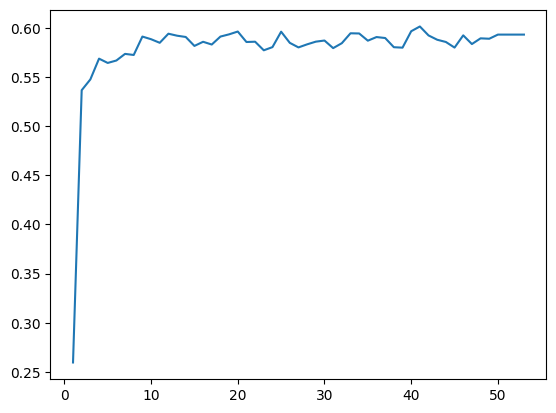

In [7]:
import matplotlib.pyplot as plt

results_selection = pd.DataFrame(results_selection)
plt.plot(results_selection["number of features"], results_selection["metric"])
selected_features = results_selection[results_selection["number of features"] == 13]["selected_features"]
print(selected_features)

- On ne garde que les variables sélectionnées

In [8]:
selected_features_list = selected_features.values[0].split(',')
train_selected = train[selected_features_list]
test_selected = test[selected_features_list]

### On lance le finetuning du modèle avec une validation croisée.

In [9]:
from src.modelling.cross_validation import gridsearch_with_cv
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, objective='binary:logistic',
                    silent=True, nthread=1)
params = {'learning_rate': [0.01, 0.05, 0.1],
          'max_depth': [3, 4, 5],
          'min_child_weight': [1, 5, 10],
          'gamma': [0.5, 1, 1.5, 2, 5],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],
          "early_stopping_rounds": [30]}

res_grid = gridsearch_with_cv(train_selected,test_selected,test_targets,train_targets, parameters_grids=params,
                              num_params_iter_max=1,
                              cv_folds=5, estimator=xgb, metric='f1')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[18:36:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-logloss:0.62125
[18:36:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-logloss:0.62132
[18:36:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-logloss:0.62128
[18:36:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-logloss:0.62091
[1]	validation_0-logloss:0.56242
[1]	validation_0-logloss:0.56240
[1]	validation_0-loglos

- On affiche les informations du meilleur modèle

In [10]:
print('\n Résultats du finetuning:')
results = pd.DataFrame(res_grid.cv_results_)
print(results)
print('\n Meilleur modèle:')
print(res_grid.best_estimator_)
print('\n Meilleurs paramètres:')
print(res_grid.best_params_)


 Résultats du finetuning:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.116345      0.123759          0.01409        0.000503   

  param_subsample param_min_child_weight param_max_depth param_learning_rate  \
0             0.8                      5               4                 0.1   

  param_gamma param_early_stopping_rounds param_colsample_bytree  \
0         0.5                          30                    1.0   

                                              params  split0_test_score  \
0  {'subsample': 0.8, 'min_child_weight': 5, 'max...           0.560575   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.584615           0.602362           0.584493           0.574575   

   mean_test_score  std_test_score  rank_test_score  
0         0.581324        0.013708                1  

 Meilleur modèle:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, 

### Importance des variables du modèle

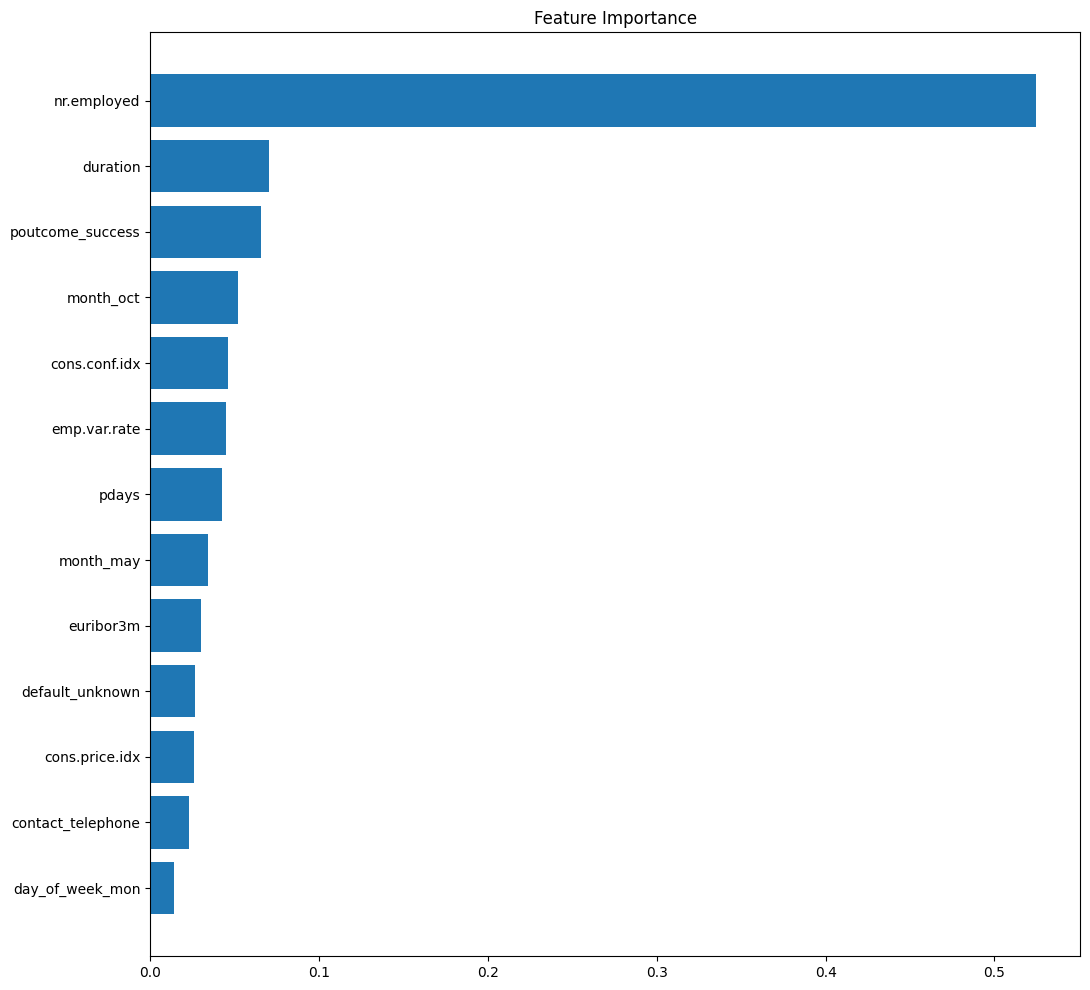

In [11]:
from src.modelling.model_analysis import plot_feature_importance
model = res_grid.best_estimator_
plot_feature_importance(model, selected_features_list)

### Partial dependence plot des variables du modèle

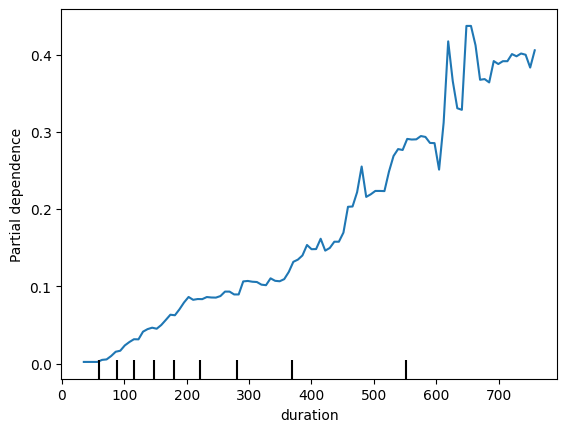

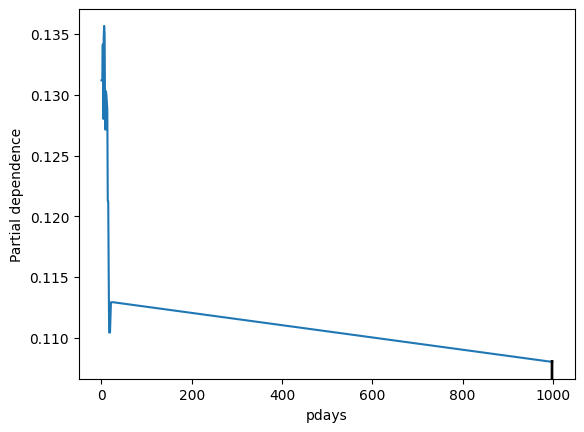

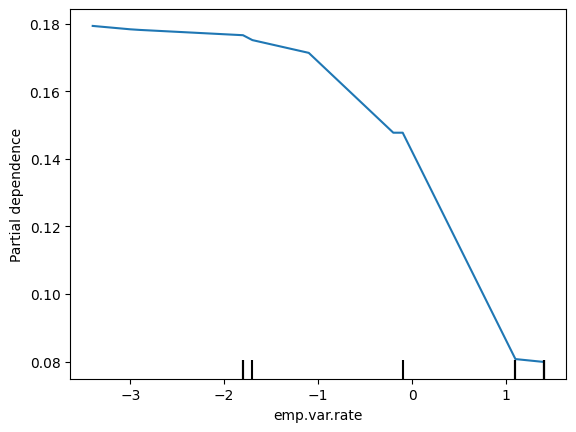

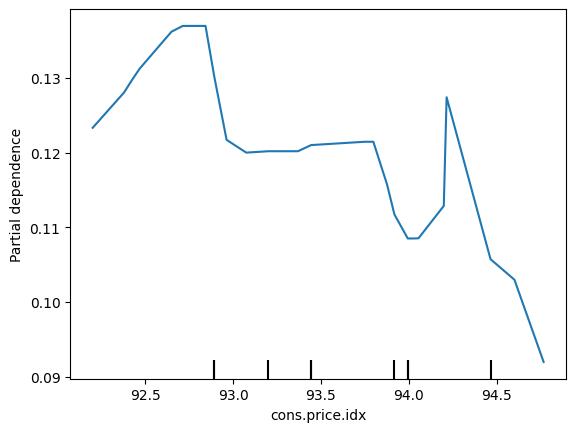

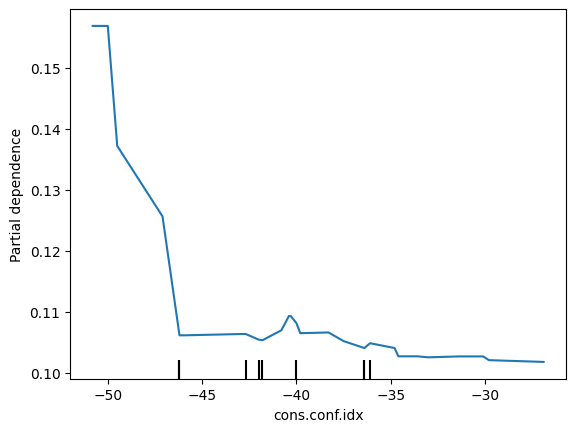

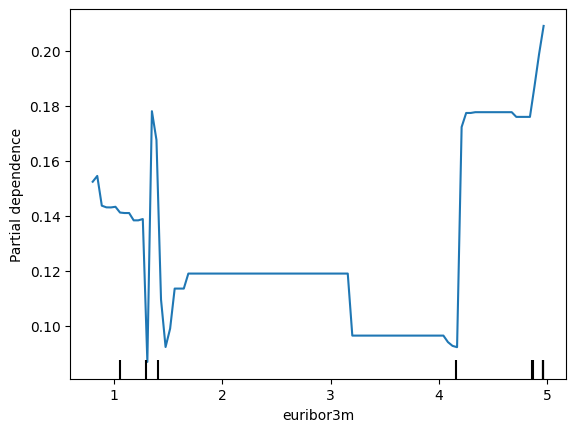

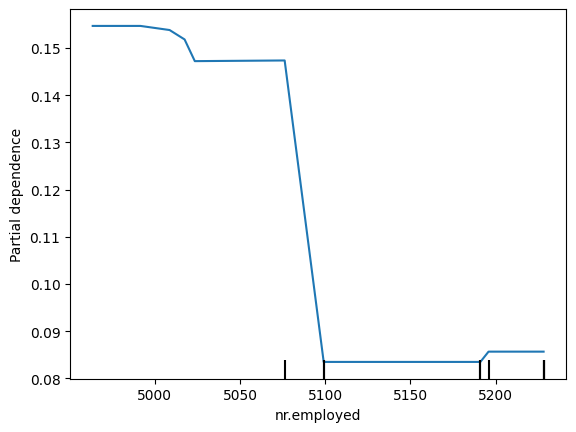

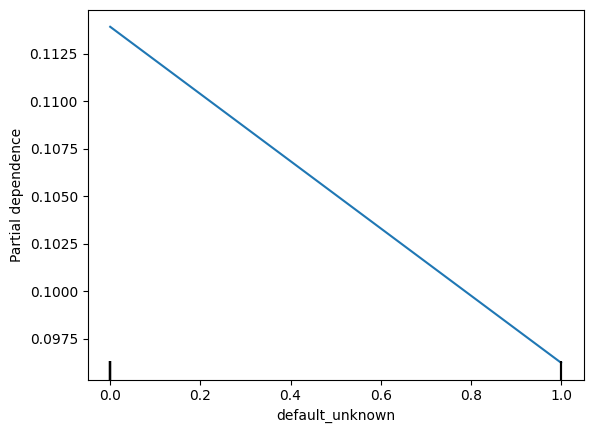

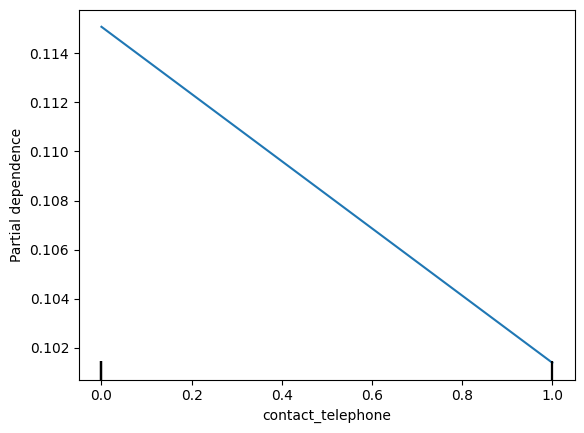

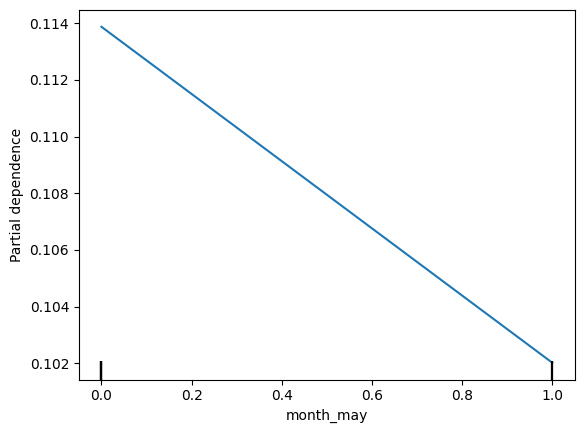

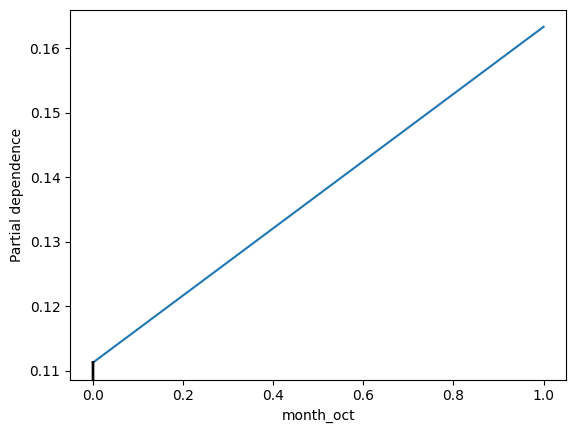

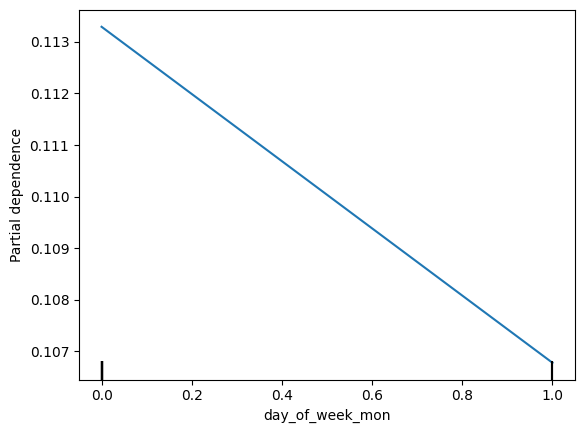

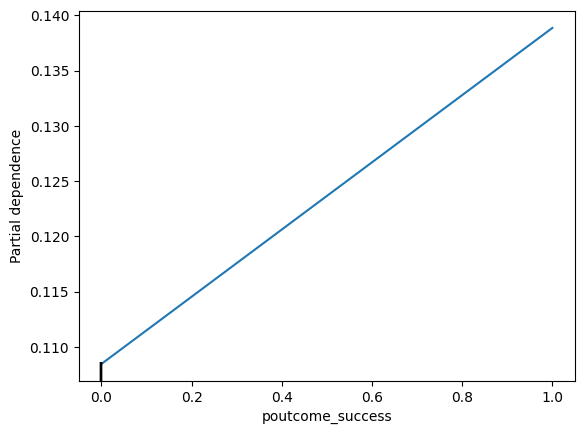

In [12]:
from src.modelling.model_analysis import save_and_plot_partial_dependence_plots
save_and_plot_partial_dependence_plots(model, train_selected,selected_features_list)

### Analyse des shapley values sur test

Permutation explainer: 825it [01:15,  9.75it/s]                         


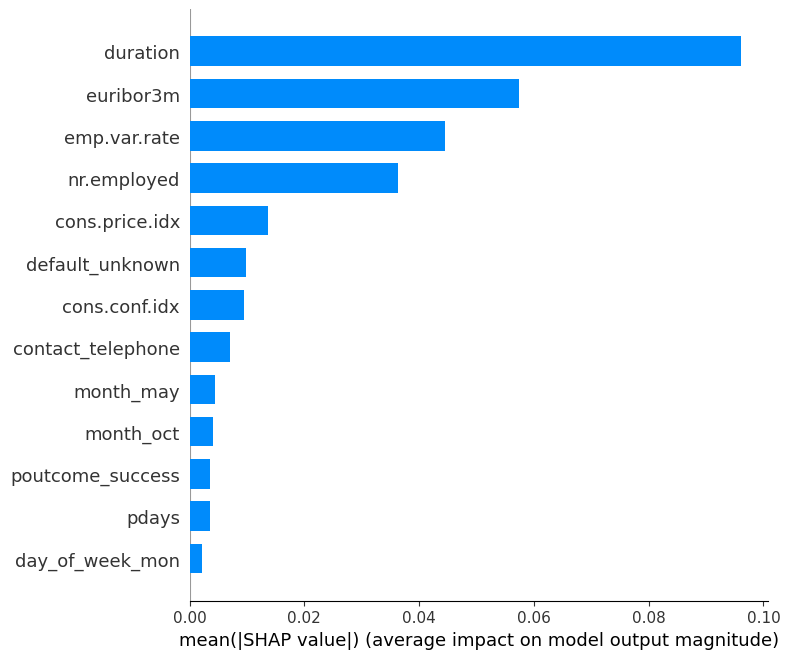

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


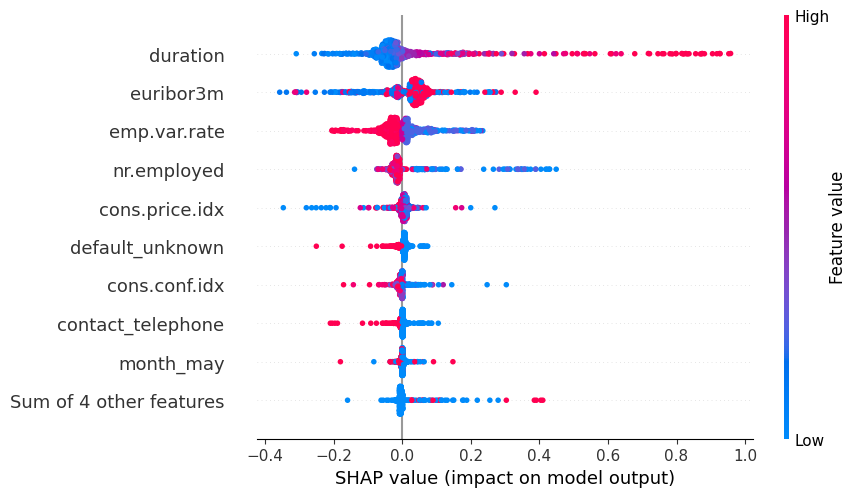

In [13]:
from src.modelling.model_analysis import plot_shapley_values
plot_shapley_values(model, test_selected, 0.05)

### Performance du modèle en test

In [14]:
from sklearn.metrics import classification_report
print("Distribution de la cible en test :",test_targets.value_counts())
prediction = res_grid.best_estimator_.predict(test_selected)
disp = classification_report(test_targets, prediction)
print(disp)

Distribution de la cible en test : 0    14602
1     1874
Name: y, dtype: int64
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14602
           1       0.68      0.55      0.61      1874

    accuracy                           0.92     16476
   macro avg       0.81      0.76      0.78     16476
weighted avg       0.91      0.92      0.92     16476

